#**Analyzing stock price history in support of option speculation**
    
###<p style="line-height: 1.3;">In order to maximize their returns, many investors are choosing to speculate with options. Instead of a more conservative approach of investing in stocks or Electronically Traded Funds (ETFs) and using options to protect their investments, risk takers are buying and selling options to take advantage of their high potential of return. Since an options contract has an expiration date, part of their value degrades over time, actually every day. Because of this many speculators engage in day trading, buying and selling their contracts within one day. In order to day trade successfully, the investor has to anticipate whether the day will be bearish or bullish for the underlying stock, buying then selling a put contract for the former or buying then selling a call contract for the latter.

###<p style="line-height: 1.3;">One approach used by the options speculator is called technical analysis, evaluating statistical trends gathered from trading activity including price and volume. Speculators have access to scores of statistical tools that can aid in predicting a bullish or bearish day. Some of these tools are a bit obscure and understanding how to use them  requires a sophisticated understanding of statistics. Quite a bit, however, can be learned from some simple analyses. One popular ETF used by the options speculator has the symbol SPY and it is based on the Standard & Poor's 500 index. SPY options are popular among speculators due to their high volume, weekly expiration dates, one half dollar increments in strike price and very thin spreads, the difference between the bid and ask prices. A time series plot of the ETF for the last six months follows.

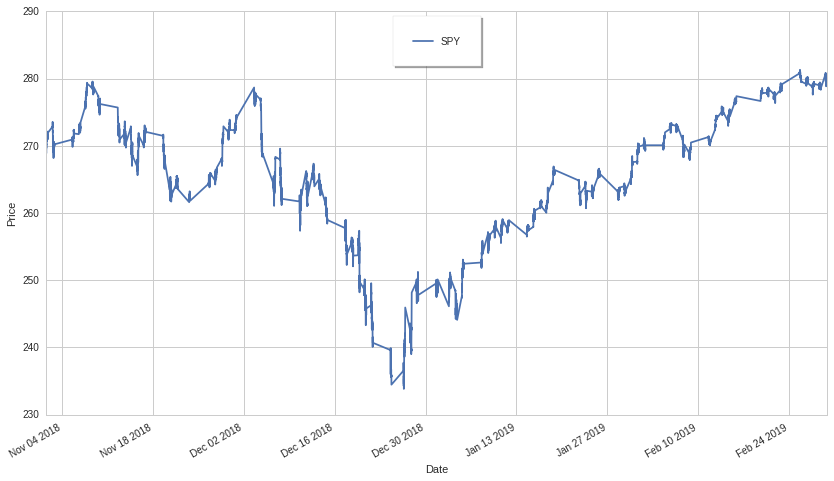

In [28]:
# Research environment functions
from quantopian.research import prices, symbols

# Pandas library: https://pandas.pydata.org/
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

# Query historical pricing data
asset = 'SPY'
TimeSeriesPrices = prices(
    assets=symbols(asset),
    start='2018-11-01',
    end='2019-03-01', price_field='close',frequency='minute')

TimeSeriesPrices.plot(label=asset)
plt.xlabel ('Date')
plt.ylabel ('Price')
plt.legend ( loc='upper center', borderpad= 2, shadow = 'True')
plt.show()


###<p style="line-height: 1.3;">The data displayed includes prices for only when the market is open, 6:30 AM to 1 PM PST. No premarket or after market data is included. The longer lines represent gap up or gap down changes in price during off hours or through the weekends. The data should provide a rich breadth covering both a down and up trend.

###<p style="line-height: 1.3;">One simple addition we can make to the data is to indicate whether the day is a bullish or bearish day by determing the maximum and minimum prices for the day. A bear day is when the maximum price preceded the minimum price for the day, suggesting a purchase then sale of a put. The reverse, the maximum following the minimum for a bull day suggests buying then selling a call. An overlay of the bear and bull days are included below.

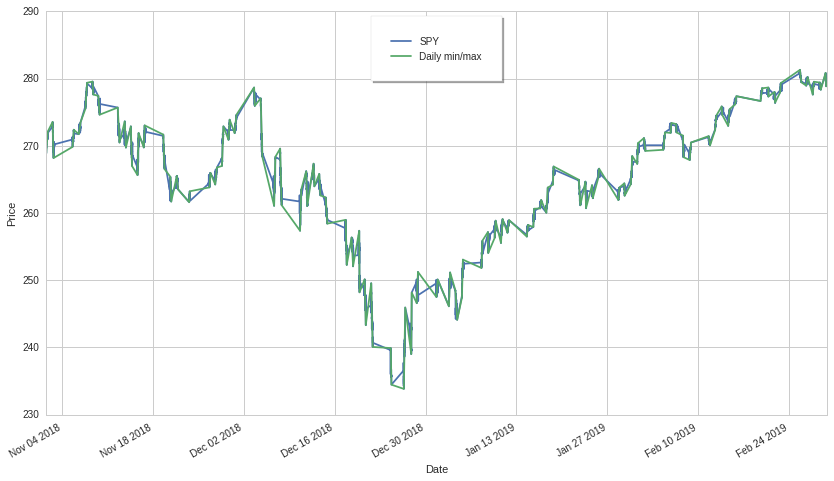

In [29]:
# Query historical pricing data
TimeSeriesPrices = prices(
    assets=symbols(asset),
    start='2018-11-01',
    end='2019-03-01', price_field='close',frequency='minute')

#find the min and max for each day
dailyMin = TimeSeriesPrices.groupby(TimeSeriesPrices.index.date).nsmallest(1)
dailyMax = TimeSeriesPrices.groupby(TimeSeriesPrices.index.date).nlargest(1)

#clean up the series' indexing
dailyMin.index = dailyMin.index.droplevel(0)
dailyMax.index = dailyMax.index.droplevel(0)

#blend the mins and maxes
lines = dailyMin.append(dailyMax)
#lines.sort_index()

TimeSeriesPrices.plot(label=asset)
lines.plot(label='Daily min/max')
plt.xlabel ('Date')
plt.ylabel ('Price')
plt.legend ( loc='upper center', borderpad= 2, shadow = 'True')
plt.show()

###<p style="line-height: 1.3;">It's a little hard to see the data so, zooming in to the last week in February -

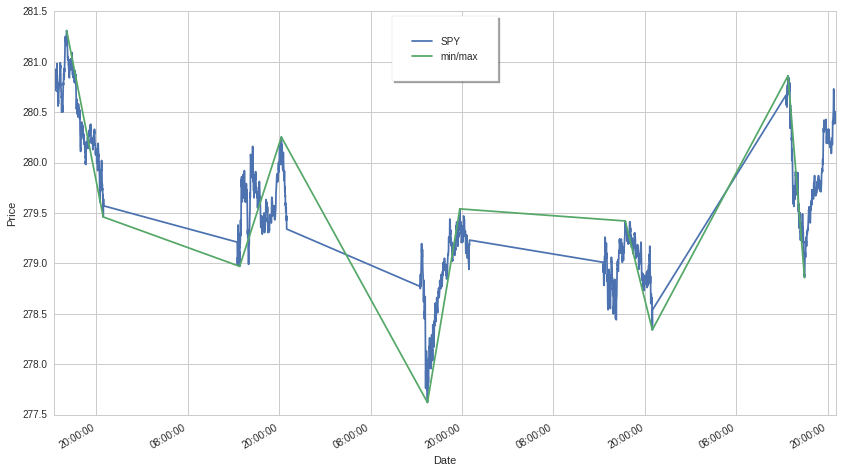

In [30]:
# Query historical pricing data
TimeSeriesPrices = prices(
    assets=symbols(asset),
    start='2019-02-25',
    end='2019-03-01', price_field='close',frequency='minute')

#find the min and max for each day
dailyMin = TimeSeriesPrices.groupby(TimeSeriesPrices.index.date).nsmallest(1)
dailyMax = TimeSeriesPrices.groupby(TimeSeriesPrices.index.date).nlargest(1)

#clean up the series' indexing
dailyMin.index = dailyMin.index.droplevel(0)
dailyMax.index = dailyMax.index.droplevel(0)

#blend the mins and maxes
lines = dailyMin.append(dailyMax)
#lines.sort_index()

TimeSeriesPrices.plot(label=asset)
lines.plot(label='min/max')
plt.xlabel ('Date')
plt.ylabel ('Price')
plt.legend ( loc='upper center', borderpad= 2, shadow = 'True')
plt.show()

###<p style="line-height: 1.3;">It looks as though Monday, Thursday and Friday were bear days, and Tuesday and Wednesday were bulls. Again, holding  contracts over the weekend are not recommened due to the contracts losing value as they age. Actually, it looks as though Friday and Wednesday could be split in two yielding a sawtooth day of a bearish trend followed by a bull, but that might be hard to predict and execute the buying and selling of option contracts that precisely.

###<p style="line-height: 1.3;">Before we delve too heavily into the bear/bull data, Let's gather a few statistics on and provide some alternate visualizations of the price data, again for November 2019 through February 2019

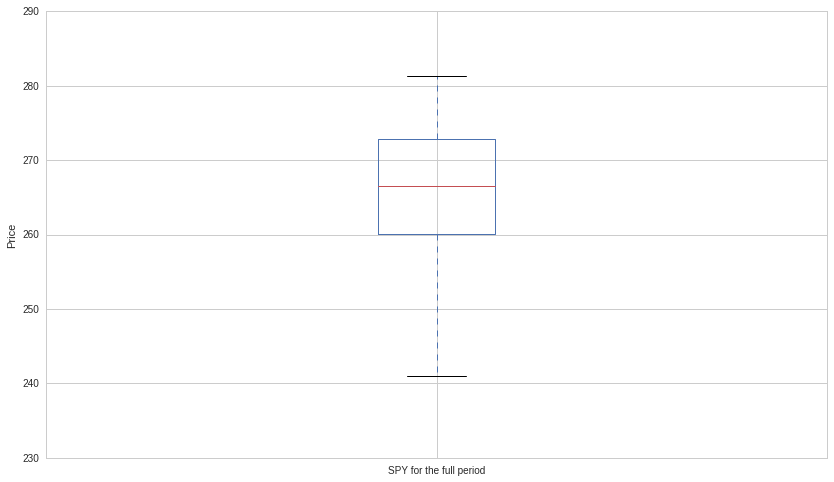

('cols', Index([Equity(8554 [SPY])], dtype='object'))
('type ', <class 'pandas.core.frame.DataFrame'>)
hi
                           Equity(8554 [SPY])
2018-11-01 13:31:00+00:00             270.152
2018-11-01 13:32:00+00:00             270.133
2018-11-01 13:33:00+00:00             270.043
2018-11-01 13:34:00+00:00             270.302
2018-11-01 13:35:00+00:00             270.241
2018-11-01 13:36:00+00:00             270.333
2018-11-01 13:37:00+00:00             270.391
2018-11-01 13:38:00+00:00             270.570
2018-11-01 13:39:00+00:00             270.481
2018-11-01 13:40:00+00:00             270.590
2018-11-01 13:41:00+00:00             270.157
2018-11-01 13:42:00+00:00             270.272
2018-11-01 13:43:00+00:00             270.237
2018-11-01 13:44:00+00:00             270.092
2018-11-01 13:45:00+00:00             270.202
2018-11-01 13:46:00+00:00             269.993
2018-11-01 13:47:00+00:00             269.596
2018-11-01 13:48:00+00:00             269.546
2018-11-01 13:49:00+

NameError: name 'date' is not defined

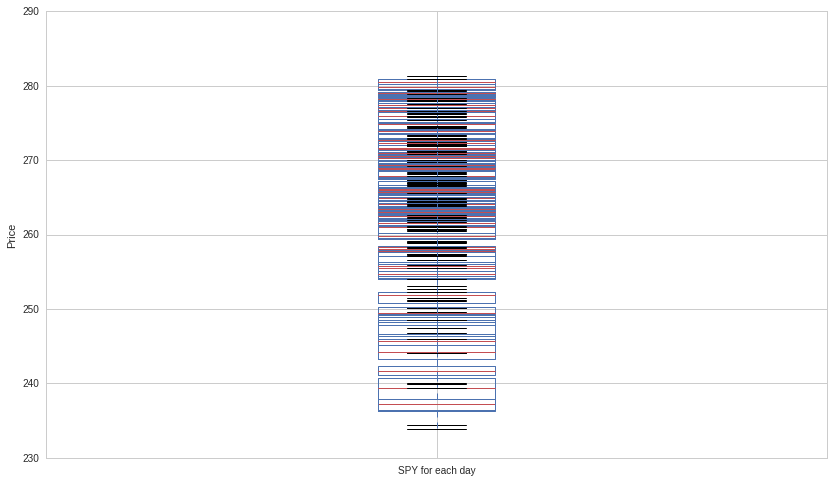

In [64]:
# Research environment functions
from quantopian.research import prices, symbols

# Pandas library: https://pandas.pydata.org/
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Query historical pricing data
TimeSeriesPrices = prices(
    assets=symbols(asset),
    start='2018-11-01',
    end='2019-03-01', price_field='close',frequency='minute')

TimeSeriesPrices.plot.box(label=asset +' for the full period')
plt.ylabel ('Price')
plt.legend ( loc='upper center', borderpad= 2, shadow = 'True')
plt.show()

priceDF = pd.DataFrame(TimeSeriesPrices)
print('cols',priceDF.columns)
print('type ',type(priceDF))
priceDF.rename({'Equity(8554 [SPY])':'Price'})
#priceDF.rename (columns='Price')

#priceDF = pd.DataFrame(data={'Date':[TimeSeriesPrices.index.date],'Prices':[TimeSeriesPrices]},\
#                       columns=['Date','Price'])
#priceDF = pd.DataFrame(np.array([TimeSeriesPrices.index.date,TimeSeriesPrices]),index=TimeSeriesPrices.index,columns=['Date','Price'])
#data = {'date': ['2014-05-01 18:47:05.069722', '2014-05-01 18:47:05.119994', '2014-05-02 18:47:05.178768', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.230071', '2014-05-02 18:47:05.280592', '2014-05-03 18:47:05.332662', '2014-05-03 18:47:05.385109', '2014-05-04 18:47:05.436523', '2014-05-04 18:47:05.486877'], 
 #       'battle_deaths': [34, 25, 26, 15, 15, 14, 26, 25, 62, 41]}
#df = pd.DataFrame(data, columns = ['date', 'battle_deaths'])
#,columns=['Date','Price'])
#df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
print('hi')
print(priceDF)
TimeSeriesPrices.groupby(TimeSeriesPrices.index.date).plot.box( label=asset + ' for each day' )
plt.ylabel ('Price')
plt.ylabel (date)
plt.legend ( loc='upper center', borderpad= 2, shadow = 'True')
plt.show()